## Импорты


In [23]:
import pandas as pd
import numpy as np
from numpy import mean
from numpy import std
from numpy import ravel
from deep_translator import GoogleTranslator
import os

import scipy
import joblib
import re
import glob
import sklearn
from math import sqrt
from decimal import Decimal


from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.model_selection import cross_val_score

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import make_scorer
from sklearn.metrics import mean_squared_error
# from sklearn.metrics import mean_absolute_percentage_error





In [24]:

print(os.getcwd())

/home/savr/zadanie_zhilie


In [19]:
# Визуализация
import seaborn as sns

import matplotlib.pyplot as plt

from mlxtend.plotting import plot_decision_regions

from mpl_toolkits.mplot3d import Axes3D

plt.rcParams['figure.dpi'] = 150
pd.set_option('display.max_columns', None)
# scipy.test()

# Препроцессинг


## Выгрузка данных и объединение


In [25]:
df = pd.read_csv('_data.csv')
display(df)

,Unnamed: 0,ID объявления,Количество комнат,Тип,Метро,Адрес,"Площадь, м2",Дом,Парковка,Цена,Телефоны,Описание,Ремонт,"Площадь комнат, м2",Балкон,Окна,Санузел,Можно с детьми/животными,Дополнительно,Название ЖК,Серия дома,"Высота потолков, м",Лифт,Мусоропровод,Ссылка на объявление
0,0,271271157,4,Квартира,м. Смоленская (9 мин пешком),"Москва, улица Новый Арбат, 27",200.0/20.0,"5/16, Монолитный",подземная,"500000.0 руб./ За месяц, Залог - 500000 руб., ...",+79166369231,Без комиссии для нанимателя! Бонус коллегам 12...,Дизайнерский,NaN,NaN,NaN,NaN,"Можно с детьми, Можно с животными","Мебель в комнатах, Мебель на кухне, Ванна, Душ...","Новый Арбат, 2010",NaN,3.00,"Пасс (4), Груз (1)",Да,https://www.cian.ru/rent/flat/271271157
1,1,271634126,4,Квартира,м. Смоленская (8 мин пешком),"Москва, улица Новый Арбат, 27",198.0/95.0/18.0,"5/16, Монолитно-кирпичный",подземная,"500000.0 руб./ За месяц, Залог - 500000 руб., ...",+79850608590,Лот 93107. Елена Анисимова.\n\nБонус агенту 50...,Дизайнерский,25 25 20 25,NaN,На улицу и двор,"Совмещенный (2), Раздельный (1)",Можно с детьми,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",Новый Арбат,NaN,3.50,"Пасс (1), Груз (1)",Нет,https://www.cian.ru/rent/flat/271634126
2,2,271173086,"4, Оба варианта",Квартира,м. Смоленская (7 мин пешком),"Москва, улица Новый Арбат, 27",200.0/116.0/4.0,5/16,подземная,"500000.0 руб./ За месяц, Залог - 500000 руб., ...","+79672086536, +79099269384","ID 36380: Шикарная 4-х км. квартира в ЖК ""Нов...",Евроремонт,NaN,NaN,На улицу и двор,Совмещенный (3),Можно с детьми,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",Новый Арбат,NaN,3.20,Пасс (1),NaN,https://www.cian.ru/rent/flat/271173086
3,3,272197456,"4, Оба варианта",Квартира,м. Смоленская (3 мин пешком),"Москва, переулок Плотников, 21С1",170.0/95.0/17.0,5/6,подземная,"400000.0 руб./ За месяц, Залог - 400000 руб., ...","+79660342340, +79099269384",ID 31618: Эксклюзивное предложение. Современн...,Евроремонт,14-42-20-19,NaN,На улицу и двор,Совмещенный (3),Можно с животными,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",NaN,NaN,3.20,Пасс (1),NaN,https://www.cian.ru/rent/flat/272197456
4,4,273614615,2,Квартира,м. Арбатская (7 мин пешком),"Москва, улица Новый Арбат, 15",58.0/38.0/5.0,"12/26, Панельный",NaN,"225000.0 руб./ За месяц, Залог - 225000 руб., ...",+79852432860,Лот 111542. Татьяна Лучкина.\n\nБонус агенту 5...,Евроремонт,20 18,NaN,На улицу и двор,Совмещенный (2),NaN,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",The Book,NaN,3.90,"Пасс (1), Груз (1)",Да,https://www.cian.ru/rent/flat/273614615
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23363,23363,215565511,NaN,Квартира,м. Говорово (8 мин пешком),"Москва, Боровское шоссе, 2к7, ш. Боровское (3 ...",35.0/16.4/8.0,10/14,NaN,"42000.0 руб./ За месяц, Залог - 42000 руб., Ко...",+79154383401,Сдаётся светлая теплая квартира (студия) с бал...,Евроремонт,NaN,Балкон (1),NaN,Совмещенный (1),NaN,"Мебель в комнатах, Мебель на кухне, Ванна, Сти...",Мещерский лес,NaN,NaN,"Пасс (1), Груз (1)",NaN,https://www.cian.ru/rent/flat/215565511
23364,23364,274654844,1,Квартира,м. Солнцево (7 мин пешком),"Москва, Производственная улица, 8к1, ш. Боровс...",38.7/16.5/11.0,"5/18, Монолитный",NaN,"45000.0 руб./ За месяц, Залог - 45000 руб., Ко...",+79151173402,Сдам однокомнатную квартиру на длительный срок...,Евроремонт,NaN,Лоджия (1),Во двор,Совмещенный (1),NaN,"Мебель в комнатах, Мебель на кухне, Ванна, Сти...",Лучи,NaN,NaN,"Пасс (1), Груз (1)",NaN,https://www.cian.ru/rent/flat/274654844
23365,23365,268679909,"2, Оба варианта",Квартира,м. Солнцево (6 мин пешком),"Москва, Боровский проезд, 11",43.1,"5/5, Кирпичный",NaN,"50000.0 руб./ За месяц, Залог - 50000 руб., Ко...",+79653825192,Рассматриваются квартиранты только славяне и т...,Дизайнерский,NaN,Балкон (1),На улицу и двор,Совмещенный (1),Можно с детьми,"Мебель на кухне, Душевая кабина, Стиральная ма...",NaN,NaN,NaN,NaN,NaN,https://www.cian.ru/rent/flat/268679909
23366,

## Чистка данных (Работаем с NuN, фильтруем лишнюю информацию, разбиваем по колонкам)

In [26]:
print(df.columns)

Index(['Unnamed: 0', 'ID  объявления', 'Количество комнат', 'Тип', 'Метро',
       'Адрес', 'Площадь, м2', 'Дом', 'Парковка', 'Цена', 'Телефоны',
       'Описание', 'Ремонт', 'Площадь комнат, м2', 'Балкон', 'Окна', 'Санузел',
       'Можно с детьми/животными', 'Дополнительно', 'Название ЖК',
       'Серия дома', 'Высота потолков, м', 'Лифт', 'Мусоропровод',
       'Ссылка на объявление'],
      dtype='object')


In [27]:
# Удаляем дубликаты по ID объявления
df = df.drop_duplicates(subset=['ID  объявления'], keep='first').reset_index(drop = True)

In [28]:
display(df)

,Unnamed: 0,ID объявления,Количество комнат,Тип,Метро,Адрес,"Площадь, м2",Дом,Парковка,Цена,Телефоны,Описание,Ремонт,"Площадь комнат, м2",Балкон,Окна,Санузел,Можно с детьми/животными,Дополнительно,Название ЖК,Серия дома,"Высота потолков, м",Лифт,Мусоропровод,Ссылка на объявление
0,0,271271157,4,Квартира,м. Смоленская (9 мин пешком),"Москва, улица Новый Арбат, 27",200.0/20.0,"5/16, Монолитный",подземная,"500000.0 руб./ За месяц, Залог - 500000 руб., ...",+79166369231,Без комиссии для нанимателя! Бонус коллегам 12...,Дизайнерский,NaN,NaN,NaN,NaN,"Можно с детьми, Можно с животными","Мебель в комнатах, Мебель на кухне, Ванна, Душ...","Новый Арбат, 2010",NaN,3.00,"Пасс (4), Груз (1)",Да,https://www.cian.ru/rent/flat/271271157
1,1,271634126,4,Квартира,м. Смоленская (8 мин пешком),"Москва, улица Новый Арбат, 27",198.0/95.0/18.0,"5/16, Монолитно-кирпичный",подземная,"500000.0 руб./ За месяц, Залог - 500000 руб., ...",+79850608590,Лот 93107. Елена Анисимова.\n\nБонус агенту 50...,Дизайнерский,25 25 20 25,NaN,На улицу и двор,"Совмещенный (2), Раздельный (1)",Можно с детьми,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",Новый Арбат,NaN,3.50,"Пасс (1), Груз (1)",Нет,https://www.cian.ru/rent/flat/271634126
2,2,271173086,"4, Оба варианта",Квартира,м. Смоленская (7 мин пешком),"Москва, улица Новый Арбат, 27",200.0/116.0/4.0,5/16,подземная,"500000.0 руб./ За месяц, Залог - 500000 руб., ...","+79672086536, +79099269384","ID 36380: Шикарная 4-х км. квартира в ЖК ""Нов...",Евроремонт,NaN,NaN,На улицу и двор,Совмещенный (3),Можно с детьми,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",Новый Арбат,NaN,3.20,Пасс (1),NaN,https://www.cian.ru/rent/flat/271173086
3,3,272197456,"4, Оба варианта",Квартира,м. Смоленская (3 мин пешком),"Москва, переулок Плотников, 21С1",170.0/95.0/17.0,5/6,подземная,"400000.0 руб./ За месяц, Залог - 400000 руб., ...","+79660342340, +79099269384",ID 31618: Эксклюзивное предложение. Современн...,Евроремонт,14-42-20-19,NaN,На улицу и двор,Совмещенный (3),Можно с животными,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",NaN,NaN,3.20,Пасс (1),NaN,https://www.cian.ru/rent/flat/272197456
4,4,273614615,2,Квартира,м. Арбатская (7 мин пешком),"Москва, улица Новый Арбат, 15",58.0/38.0/5.0,"12/26, Панельный",NaN,"225000.0 руб./ За месяц, Залог - 225000 руб., ...",+79852432860,Лот 111542. Татьяна Лучкина.\n\nБонус агенту 5...,Евроремонт,20 18,NaN,На улицу и двор,Совмещенный (2),NaN,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",The Book,NaN,3.90,"Пасс (1), Груз (1)",Да,https://www.cian.ru/rent/flat/273614615
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23363,23363,215565511,NaN,Квартира,м. Говорово (8 мин пешком),"Москва, Боровское шоссе, 2к7, ш. Боровское (3 ...",35.0/16.4/8.0,10/14,NaN,"42000.0 руб./ За месяц, Залог - 42000 руб., Ко...",+79154383401,Сдаётся светлая теплая квартира (студия) с бал...,Евроремонт,NaN,Балкон (1),NaN,Совмещенный (1),NaN,"Мебель в комнатах, Мебель на кухне, Ванна, Сти...",Мещерский лес,NaN,NaN,"Пасс (1), Груз (1)",NaN,https://www.cian.ru/rent/flat/215565511
23364,23364,274654844,1,Квартира,м. Солнцево (7 мин пешком),"Москва, Производственная улица, 8к1, ш. Боровс...",38.7/16.5/11.0,"5/18, Монолитный",NaN,"45000.0 руб./ За месяц, Залог - 45000 руб., Ко...",+79151173402,Сдам однокомнатную квартиру на длительный срок...,Евроремонт,NaN,Лоджия (1),Во двор,Совмещенный (1),NaN,"Мебель в комнатах, Мебель на кухне, Ванна, Сти...",Лучи,NaN,NaN,"Пасс (1), Груз (1)",NaN,https://www.cian.ru/rent/flat/274654844
23365,23365,268679909,"2, Оба варианта",Квартира,м. Солнцево (6 мин пешком),"Москва, Боровский проезд, 11",43.1,"5/5, Кирпичный",NaN,"50000.0 руб./ За месяц, Залог - 50000 руб., Ко...",+79653825192,Рассматриваются квартиранты только славяне и т...,Дизайнерский,NaN,Балкон (1),На улицу и двор,Совмещенный (1),Можно с детьми,"Мебель на кухне, Душевая кабина, Стиральная ма...",NaN,NaN,NaN,NaN,NaN,https://www.cian.ru/rent/flat/268679909
23366,

In [29]:
# Удаляем не нужные столбцы
df = df.drop(['Unnamed: 0', 'ID  объявления', 'Телефоны', 'Описание', 'Название ЖК', 'Серия дома', 'Ссылка на объявление'], axis = 1)

In [30]:
# Заполняем нан в количество комнат, ремонт 
df['Количество комнат'] = df['Количество комнат'].fillna('Без информации')
df['Парковка'] = df['Парковка'].fillna('Свободная парковка')
df['Площадь комнат, м2'] = df['Площадь комнат, м2'].fillna('Без информации')
df['Балкон'] = df['Балкон'].fillna('Без информации')
df['Окна'] = df['Окна'].fillna('Без информации')
df['Санузел'] = df['Санузел'].fillna('Без информации')
df['Балкон'] = df['Балкон'].fillna('Без информации')
df['Можно с детьми/животными'] = df['Можно с детьми/животными'].fillna('Без информации')
df['Высота потолков, м'] = df['Высота потолков, м'].fillna('Без информации')
df['Мусоропровод'] = df['Мусоропровод'].fillna('Без информации')

In [31]:
display(df)

,Количество комнат,Тип,Метро,Адрес,"Площадь, м2",Дом,Парковка,Цена,Ремонт,"Площадь комнат, м2",Балкон,Окна,Санузел,Можно с детьми/животными,Дополнительно,"Высота потолков, м",Лифт,Мусоропровод
0,4,Квартира,м. Смоленская (9 мин пешком),"Москва, улица Новый Арбат, 27",200.0/20.0,"5/16, Монолитный",подземная,"500000.0 руб./ За месяц, Залог - 500000 руб., ...",Дизайнерский,Без информации,Без информации,Без информации,Без информации,"Можно с детьми, Можно с животными","Мебель в комнатах, Мебель на кухне, Ванна, Душ...",3.0,"Пасс (4), Груз (1)",Да
1,4,Квартира,м. Смоленская (8 мин пешком),"Москва, улица Новый Арбат, 27",198.0/95.0/18.0,"5/16, Монолитно-кирпичный",подземная,"500000.0 руб./ За месяц, Залог - 500000 руб., ...",Дизайнерский,25 25 20 25,Без информации,На улицу и двор,"Совмещенный (2), Раздельный (1)",Можно с детьми,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",3.5,"Пасс (1), Груз (1)",Нет
2,"4, Оба варианта",Квартира,м. Смоленская (7 мин пешком),"Москва, улица Новый Арбат, 27",200.0/116.0/4.0,5/16,подземная,"500000.0 руб./ За месяц, Залог - 500000 руб., ...",Евроремонт,Без информации,Без информации,На улицу и двор,Совмещенный (3),Можно с детьми,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",3.2,Пасс (1),Без информации
3,"4, Оба варианта",Квартира,м. Смоленская (3 мин пешком),"Москва, переулок Плотников, 21С1",170.0/95.0/17.0,5/6,подземная,"400000.0 руб./ За месяц, Залог - 400000 руб., ...",Евроремонт,14-42-20-19,Без информации,На улицу и двор,Совмещенный (3),Можно с животными,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",3.2,Пасс (1),Без информации
4,2,Квартира,м. Арбатская (7 мин пешком),"Москва, улица Новый Арбат, 15",58.0/38.0/5.0,"12/26, Панельный",Свободная парковка,"225000.0 руб./ За месяц, Залог - 225000 руб., ...",Евроремонт,20 18,Без информации,На улицу и двор,Совмещенный (2),Без информации,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",3.9,"Пасс (1), Груз (1)",Да
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23363,Без информации,Квартира,м. Говорово (8 мин пешком),"Москва, Боровское шоссе, 2к7, ш. Боровское (3 ...",35.0/16.4/8.0,10/14,Свободная парковка,"42000.0 руб./ За месяц, Залог - 42000 руб., Ко...",Евроремонт,Без информации,Балкон (1),Без информации,Совмещенный (1),Без информации,"Мебель в комнатах, Мебель на кухне, Ванна, Сти...",Без информации,"Пасс (1), Груз (1)",Без информации
23364,1,Квартира,м. Солнцево (7 мин пешком),"Москва, Производственная улица, 8к1, ш. Боровс...",38.7/16.5/11.0,"5/18, Монолитный",Свободная парковка,"45000.0 руб./ За месяц, Залог - 45000 руб., Ко...",Евроремонт,Без информации,Лоджия (1),Во двор,Совмещенный (1),Без информации,"Мебель в комнатах, Мебель на кухне, Ванна, Сти...",Без информации,"Пасс (1), Груз (1)",Без информации
23365,"2, Оба варианта",Квартира,м. Солнцево (6 мин пешком),"Москва, Боровский проезд, 11",43.1,"5/5, Кирпичный",Свободная парковка,"50000.0 руб./ За месяц, Залог - 50000 руб., Ко...",Дизайнерский,Без информации,Балкон (1),На улицу и двор,Совмещенный (1),Можно с детьми,"Мебель на кухне, Душевая кабина, Стиральная ма...",Без информации,NaN,Без информации
23366,2,Квартира,м. Солнцево (11 мин пешком),"Москва, улица Богданова, 6к1, ш. Боровское (3 ...",52.5/10.0,"8/23, Монолитный",наземная,"55000.0 руб./ За месяц, Залог - 50000 руб., Ко...",Евроремонт,Без информации,Лоджия (1),Во двор,"Совмещенный (1), Раздельный (1)",Без информации,"Мебель в комнатах, Мебель на кухне, Ванна, Сти...",2.65,Пасс (3),Да


In [32]:
# Добавляем новый столбец, и заполняем типом квартиры из кол-во комнат, а там где нет кол-во, заполняем стандартом
df['Тип'] = [row.split(', ')[-1] if len(row) != 1 else 'Стандарт' for row in df['Количество комнат']]

In [33]:
display(df['Тип'])

0              Стандарт
1              Стандарт
2          Оба варианта
3          Оба варианта
4              Стандарт
              ...      
23363    Без информации
23364          Стандарт
23365      Оба варианта
23366          Стандарт
23367      Оба варианта
Name: Тип, Length: 23368, dtype: object

In [34]:
# Изменяем колонку кол-во комнат оставляя там только кол-во квартир, а там где нет ко-во ставим 0
df['Количество комнат'] = [int(row.split(', ')[0]) if len(row.split(', ')[0]) == 1 else 0 for row in df['Количество комнат']]

In [35]:
display(df['Количество комнат'])

0        4
1        4
2        4
3        4
4        2
        ..
23363    0
23364    1
23365    2
23366    2
23367    2
Name: Количество комнат, Length: 23368, dtype: int64

In [36]:
# Обрабатываем колонку метро
df['Метро'] = df['Метро'].astype(str)
# Извлечение первого элемента после разделения по ' ('
df['Метро'] = [row.split(' (')[0] for row in df['Метро']]

# Извлечение второго элемента после разделения по '. '
# с проверкой на наличие второго элемента
df['Метро'] = [row.split('. ')[1] if '.' in row else row for row in df['Метро']]

In [37]:
display(df['Метро'])

0        Смоленская
1        Смоленская
2        Смоленская
3        Смоленская
4         Арбатская
            ...    
23363      Говорово
23364      Солнцево
23365      Солнцево
23366      Солнцево
23367      Говорово
Name: Метро, Length: 23368, dtype: object

In [38]:
# Обрабатываем колонку с площадью, берём только общую площадь
df['Площадь кв, м2'] = [row.split('/')[0] for row in df['Площадь, м2']]
# df['Площадь жилая, м2'] = [row.split('/')[1] if len(row) > 6 else 0 for row in df['Площадь, м2']]
# df['Площадь кухни, м2'] = [row.split('/')[-1] if len(row) > 6 else 0 for row in df['Площадь, м2']]

In [39]:
display(df['Площадь кв, м2'])

0        200.0
1        198.0
2        200.0
3        170.0
4         58.0
         ...  
23363     35.0
23364     38.7
23365     43.1
23366     52.5
23367     90.0
Name: Площадь кв, м2, Length: 23368, dtype: object

In [40]:
# Удаляем колонку со старой площадью
df = df.drop(['Площадь, м2'], axis = 1)
df = df.drop(['Площадь комнат, м2'], axis = 1)

In [41]:
# Обрабатываем колонку "парковка"
df['Парковка'] = df['Парковка'].replace(to_replace ='открытая', value = 'бесплатная во дворе', regex = True)
df['Парковка'] = df['Парковка'].replace(to_replace ='наземная', value = 'платная во дворе', regex = True)
df['Парковка'] = df['Парковка'].fillna('бесплатная во дворе')

In [42]:
display(df['Цена'])

0        500000.0 руб./ За месяц, Залог - 500000 руб., ...
1        500000.0 руб./ За месяц, Залог - 500000 руб., ...
2        500000.0 руб./ За месяц, Залог - 500000 руб., ...
3        400000.0 руб./ За месяц, Залог - 400000 руб., ...
4        225000.0 руб./ За месяц, Залог - 225000 руб., ...
                               ...                        
23363    42000.0 руб./ За месяц, Залог - 42000 руб., Ко...
23364    45000.0 руб./ За месяц, Залог - 45000 руб., Ко...
23365    50000.0 руб./ За месяц, Залог - 50000 руб., Ко...
23366    55000.0 руб./ За месяц, Залог - 50000 руб., Ко...
23367    57000.0 руб./ За месяц, Залог - 60000 руб., Ко...
Name: Цена, Length: 23368, dtype: object

In [43]:
df[['Основная стоимость', 'Дополнительная информация']] = df['Цена'].str.split(' руб./', expand=True)

df = df.drop(['Цена'], axis = 1)

# Вывод измененного DataFrame
display(df)

,Количество комнат,Тип,Метро,Адрес,Дом,Парковка,Ремонт,Балкон,Окна,Санузел,Можно с детьми/животными,Дополнительно,"Высота потолков, м",Лифт,Мусоропровод,"Площадь кв, м2",Основная стоимость,Дополнительная информация
0,4,Стандарт,Смоленская,"Москва, улица Новый Арбат, 27","5/16, Монолитный",подземная,Дизайнерский,Без информации,Без информации,Без информации,"Можно с детьми, Можно с животными","Мебель в комнатах, Мебель на кухне, Ванна, Душ...",3.0,"Пасс (4), Груз (1)",Да,200.0,500000.0,"За месяц, Залог - 500000 руб., Коммунальные у..."
1,4,Стандарт,Смоленская,"Москва, улица Новый Арбат, 27","5/16, Монолитно-кирпичный",подземная,Дизайнерский,Без информации,На улицу и двор,"Совмещенный (2), Раздельный (1)",Можно с детьми,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",3.5,"Пасс (1), Груз (1)",Нет,198.0,500000.0,"За месяц, Залог - 500000 руб., Коммунальные у..."
2,4,Оба варианта,Смоленская,"Москва, улица Новый Арбат, 27",5/16,подземная,Евроремонт,Без информации,На улицу и двор,Совмещенный (3),Можно с детьми,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",3.2,Пасс (1),Без информации,200.0,500000.0,"За месяц, Залог - 500000 руб., Срок аренды - ..."
3,4,Оба варианта,Смоленская,"Москва, переулок Плотников, 21С1",5/6,подземная,Евроремонт,Без информации,На улицу и двор,Совмещенный (3),Можно с животными,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",3.2,Пасс (1),Без информации,170.0,400000.0,"За месяц, Залог - 400000 руб., Срок аренды - ..."
4,2,Стандарт,Арбатская,"Москва, улица Новый Арбат, 15","12/26, Панельный",Свободная парковка,Евроремонт,Без информации,На улицу и двор,Совмещенный (2),Без информации,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",3.9,"Пасс (1), Груз (1)",Да,58.0,225000.0,"За месяц, Залог - 225000 руб., Коммунальные у..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23363,0,Без информации,Говорово,"Москва, Боровское шоссе, 2к7, ш. Боровское (3 ...",10/14,Свободная парковка,Евроремонт,Балкон (1),Без информации,Совмещенный (1),Без информации,"Мебель в комнатах, Мебель на кухне, Ванна, Сти...",Без информации,"Пасс (1), Груз (1)",Без информации,35.0,42000.0,"За месяц, Залог - 42000 руб., Коммунальные ус..."
23364,1,Стандарт,Солнцево,"Москва, Производственная улица, 8к1, ш. Боровс...","5/18, Монолитный",Свободная парковка,Евроремонт,Лоджия (1),Во двор,Совмещенный (1),Без информации,"Мебель в комнатах, Мебель на кухне, Ванна, Сти...",Без информации,"Пасс (1), Груз (1)",Без информации,38.7,45000.0,"За месяц, Залог - 45000 руб., Коммунальные ус..."
23365,2,Оба варианта,Солнцево,"Москва, Боровский проезд, 11","5/5, Кирпичный",Свободная парковка,Дизайнерский,Балкон (1),На улицу и двор,Совмещенный (1),Можно с детьми,"Мебель на кухне, Душевая кабина, Стиральная ма...",Без информации,NaN,Без информации,43.1,50000.0,"За месяц, Залог - 50000 руб., Коммунальные ус..."
23366,2,Стандарт,Солнцево,"Москва, улица Богданова, 6к1, ш. Боровское (3 ...","8/23, Монолитный",платная во дворе,Евроремонт,Лоджия (1),Во двор,"Совмещенный (1), Раздельный (1)",Без информации,"Мебель в комнатах, Мебель на кухне, Ванна, Сти...",2.65,Пасс (3),Да,52.5,55000.0,"За месяц, Залог - 50000 руб., Коммунальные ус..."


In [44]:
print(df['Основная стоимость'].dtypes)

object


In [45]:
# Преобразование строк, представляющих числа с плавающей запятой, в float
df['Основная стоимость'] = pd.to_numeric(df['Основная стоимость'], errors='coerce')


In [46]:
print(df['Основная стоимость'].dtypes)

float64


In [47]:
# Обрабатываем колонку "балкон"
df['Балкон'] = df['Балкон'].fillna('Балкон (0), Лоджия (0)')
df['Лоджия'] = [row.split(' ')[-1] if (row.split(' ')[-2]) == 'Лоджия' else '(0)' for row in df['Балкон']]
df['Балкон'] = [row.split(' ')[1] if row.split(' ')[0] == 'Балкон' else '(0)' for row in df['Балкон']]

In [48]:
# Корректируем значения, избавляясь от скобок и переделывая из str в int
df['Лоджия'] = [row.split('(')[1] for row in df['Лоджия']]
df['Лоджия'] = [int(row.split(')')[0]) for row in df['Лоджия']]
df['Балкон'] = [row.split('(')[1] for row in df['Балкон']]
df['Балкон'] = [int(row.split(')')[0]) for row in df['Балкон']]

In [49]:
# Все пропущенные окна закидываем в категорию "во двор"
# Есть вариант раскидать по всем колонкам
df['Окна'] = df['Окна'].fillna('Во двор')

In [50]:
# Разбиваем колонку дом
df['Тип дома'] = [row.split(', ')[-1] if len(row.split(', ')[-1]) > 6 else 'Неизвестно' for row in df['Дом']]
df['Этажность дома'] = [int(row.split('/')[1].split(',')[0]) for row in df['Дом']]
df['Этаж квартиры'] = [int(row.split('/')[0]) for row in df['Дом']]
df = df.drop(['Дом'], axis = 1)

In [51]:
# Избавляемся от NaN, если меньше 5 этажей - нет лифта, в остальном по одному каждого лифта
df['Лифт'] = [row if row == row else
              ['Пасс (1), Груз (1)' if df['Этажность дома'].iloc[i]>5 else 'Пасс (0), Груз (0)'][0]
              for i, row in enumerate(df['Лифт'])]

In [52]:
# Разбиваем колонку с лифтами на две раздельные 
df['Лифт пасс'] = [row.split(' ')[1] if (row.split(' ')[0]) == 'Пасс' else '(0)' for row in df['Лифт']]
df['Лифт груз'] = [row.split(' ')[-1] if (row.split(' ')[-2]) == 'Груз' else '(0)' for row in df['Лифт']]

In [53]:
# Убираем скобки
df['Лифт пасс'] = [row.split('(')[1] for row in df['Лифт пасс']]
df['Лифт пасс'] = [int(row.split(')')[0]) for row in df['Лифт пасс']]
df['Лифт груз'] = [row.split('(')[1] for row in df['Лифт груз']]
df['Лифт груз'] = [int(row.split(')')[0]) for row in df['Лифт груз']]
df = df.drop(['Лифт'], axis = 1)

In [54]:
# Аналогичные операции с колонкой "Санузел"
df['Санузел'] = df['Санузел'].fillna('Совмещенный (1)')
df['Санузел совмещенный'] = [row.split(' ')[1] if (row.split(' ')[0]) == 'Совмещенный' else '(0)' for row in df['Санузел']]
df['Санузел раздельный'] = [row.split(' ')[-1] if (row.split(' ')[-2]) == 'Раздельный' else '(0)' for row in df['Санузел']]
df['Санузел совмещенный'] = [row.split('(')[1] for row in df['Санузел совмещенный']]
df['Санузел совмещенный'] = [int(row.split(')')[0]) for row in df['Санузел совмещенный']]
df['Санузел раздельный'] = [row.split('(')[1] for row in df['Санузел раздельный']]
df['Санузел раздельный'] = [int(row.split(')')[0]) for row in df['Санузел раздельный']]
df = df.drop(['Санузел'], axis = 1)

In [55]:
# Заполняем NaNы
df['Мусоропровод'] = df['Мусоропровод'].fillna('Нет')

In [56]:
# Заполняем пустые значения средними
df['Высота потолков, м'] = df['Высота потолков, м'].fillna(round(df['Высота потолков, м'].mean(), 2))

TypeError: unsupported operand type(s) for +: 'float' and 'str'

In [ ]:
# Проверяем, что всё сделали правильно:)
#df[df['Тип квартиры'].isin(['Стандарт'])]
# df[df['Ремонт'].isna()].tail(50)
# print(len(df['Высота потолков, м'].unique()))
# print(df['Высота потолков, м'].unique())
# print(df['Высота потолков, м'].value_counts())
# print(round(df['Высота потолков, м'].mean(), 2))

In [57]:
display(df)

,Количество комнат,Тип,Метро,Адрес,Парковка,Ремонт,Балкон,Окна,Можно с детьми/животными,Дополнительно,"Высота потолков, м",Мусоропровод,"Площадь кв, м2",Основная стоимость,Дополнительная информация,Лоджия,Тип дома,Этажность дома,Этаж квартиры,Лифт пасс,Лифт груз,Санузел совмещенный,Санузел раздельный
0,4,Стандарт,Смоленская,"Москва, улица Новый Арбат, 27",подземная,Дизайнерский,0,Без информации,"Можно с детьми, Можно с животными","Мебель в комнатах, Мебель на кухне, Ванна, Душ...",3.0,Да,200.0,500000.0,"За месяц, Залог - 500000 руб., Коммунальные у...",0,Монолитный,16,5,4,1,0,0
1,4,Стандарт,Смоленская,"Москва, улица Новый Арбат, 27",подземная,Дизайнерский,0,На улицу и двор,Можно с детьми,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",3.5,Нет,198.0,500000.0,"За месяц, Залог - 500000 руб., Коммунальные у...",0,Монолитно-кирпичный,16,5,1,1,2,1
2,4,Оба варианта,Смоленская,"Москва, улица Новый Арбат, 27",подземная,Евроремонт,0,На улицу и двор,Можно с детьми,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",3.2,Без информации,200.0,500000.0,"За месяц, Залог - 500000 руб., Срок аренды - ...",0,Неизвестно,16,5,1,0,3,0
3,4,Оба варианта,Смоленская,"Москва, переулок Плотников, 21С1",подземная,Евроремонт,0,На улицу и двор,Можно с животными,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",3.2,Без информации,170.0,400000.0,"За месяц, Залог - 400000 руб., Срок аренды - ...",0,Неизвестно,6,5,1,0,3,0
4,2,Стандарт,Арбатская,"Москва, улица Новый Арбат, 15",Свободная парковка,Евроремонт,0,На улицу и двор,Без информации,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",3.9,Да,58.0,225000.0,"За месяц, Залог - 225000 руб., Коммунальные у...",0,Панельный,26,12,1,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23363,0,Без информации,Говорово,"Москва, Боровское шоссе, 2к7, ш. Боровское (3 ...",Свободная парковка,Евроремонт,1,Без информации,Без информации,"Мебель в комнатах, Мебель на кухне, Ванна, Сти...",Без информации,Без информации,35.0,42000.0,"За месяц, Залог - 42000 руб., Коммунальные ус...",0,Неизвестно,14,10,1,1,1,0
23364,1,Стандарт,Солнцево,"Москва, Производственная улица, 8к1, ш. Боровс...",Свободная парковка,Евроремонт,0,Во двор,Без информации,"Мебель в комнатах, Мебель на кухне, Ванна, Сти...",Без информации,Без информации,38.7,45000.0,"За месяц, Залог - 45000 руб., Коммунальные ус...",1,Монолитный,18,5,1,1,1,0
23365,2,Оба варианта,Солнцево,"Москва, Боровский проезд, 11",Свободная парковка,Дизайнерский,1,На улицу и двор,Можно с детьми,"Мебель на кухне, Душевая кабина, Стиральная ма...",Без информации,Без информации,43.1,50000.0,"За месяц, Залог - 50000 руб., Коммунальные ус...",0,Кирпичный,5,5,0,0,1,0
23366,2,Стандарт,Солнцево,"Москва, улица Богданова, 6к1, ш. Боровское (3 ...",платная во дворе,Евроремонт,0,Во двор,Без информации,"Мебель в комнатах, Мебель на кухне, Ванна, Сти...",2.65,Да,52.5,55000.0,"За месяц, Залог - 50000 руб., Коммунальные ус...",1,Монолитный,23,8,3,0,1,1


In [58]:
### Перевод названия колонок на английский язык

In [63]:
# Создаем экземпляр переводчика
translator = GoogleTranslator(source='auto', target='en')

# Функция для перевода названия колонки
def translate_column_name(column_name):
    return translator.translate(column_name).replace(' ', '_') 

# Применяем функцию к каждому названию колонки
translated_columns = {translate_column_name(x): x for x in df.columns}

# Переименовываем колонки
df.rename(columns=translated_columns, inplace=True)


display(df)



,Количество комнат,Тип,Метро,Адрес,Парковка,Ремонт,Балкон,Окна,Можно с детьми/животными,Дополнительно,"Высота потолков, м",Мусоропровод,"Площадь кв, м2",Основная стоимость,Дополнительная информация,Лоджия,Тип дома,Этажность дома,Этаж квартиры,Лифт пасс,Лифт груз,Санузел совмещенный,Санузел раздельный
0,4,Стандарт,Смоленская,"Москва, улица Новый Арбат, 27",подземная,Дизайнерский,0,Без информации,"Можно с детьми, Можно с животными","Мебель в комнатах, Мебель на кухне, Ванна, Душ...",3.0,Да,200.0,500000.0,"За месяц, Залог - 500000 руб., Коммунальные у...",0,Монолитный,16,5,4,1,0,0
1,4,Стандарт,Смоленская,"Москва, улица Новый Арбат, 27",подземная,Дизайнерский,0,На улицу и двор,Можно с детьми,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",3.5,Нет,198.0,500000.0,"За месяц, Залог - 500000 руб., Коммунальные у...",0,Монолитно-кирпичный,16,5,1,1,2,1
2,4,Оба варианта,Смоленская,"Москва, улица Новый Арбат, 27",подземная,Евроремонт,0,На улицу и двор,Можно с детьми,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",3.2,Без информации,200.0,500000.0,"За месяц, Залог - 500000 руб., Срок аренды - ...",0,Неизвестно,16,5,1,0,3,0
3,4,Оба варианта,Смоленская,"Москва, переулок Плотников, 21С1",подземная,Евроремонт,0,На улицу и двор,Можно с животными,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",3.2,Без информации,170.0,400000.0,"За месяц, Залог - 400000 руб., Срок аренды - ...",0,Неизвестно,6,5,1,0,3,0
4,2,Стандарт,Арбатская,"Москва, улица Новый Арбат, 15",Свободная парковка,Евроремонт,0,На улицу и двор,Без информации,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",3.9,Да,58.0,225000.0,"За месяц, Залог - 225000 руб., Коммунальные у...",0,Панельный,26,12,1,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23363,0,Без информации,Говорово,"Москва, Боровское шоссе, 2к7, ш. Боровское (3 ...",Свободная парковка,Евроремонт,1,Без информации,Без информации,"Мебель в комнатах, Мебель на кухне, Ванна, Сти...",Без информации,Без информации,35.0,42000.0,"За месяц, Залог - 42000 руб., Коммунальные ус...",0,Неизвестно,14,10,1,1,1,0
23364,1,Стандарт,Солнцево,"Москва, Производственная улица, 8к1, ш. Боровс...",Свободная парковка,Евроремонт,0,Во двор,Без информации,"Мебель в комнатах, Мебель на кухне, Ванна, Сти...",Без информации,Без информации,38.7,45000.0,"За месяц, Залог - 45000 руб., Коммунальные ус...",1,Монолитный,18,5,1,1,1,0
23365,2,Оба варианта,Солнцево,"Москва, Боровский проезд, 11",Свободная парковка,Дизайнерский,1,На улицу и двор,Можно с детьми,"Мебель на кухне, Душевая кабина, Стиральная ма...",Без информации,Без информации,43.1,50000.0,"За месяц, Залог - 50000 руб., Коммунальные ус...",0,Кирпичный,5,5,0,0,1,0
23366,2,Стандарт,Солнцево,"Москва, улица Богданова, 6к1, ш. Боровское (3 ...",платная во дворе,Евроремонт,0,Во двор,Без информации,"Мебель в комнатах, Мебель на кухне, Ванна, Сти...",2.65,Да,52.5,55000.0,"За месяц, Залог - 50000 руб., Коммунальные ус...",1,Монолитный,23,8,3,0,1,1


In [60]:
display(df)

,Количество комнат,Тип,Метро,Адрес,Парковка,Ремонт,Балкон,Окна,Можно с детьми/животными,Дополнительно,"Высота потолков, м",Мусоропровод,"Площадь кв, м2",Основная стоимость,Дополнительная информация,Лоджия,Тип дома,Этажность дома,Этаж квартиры,Лифт пасс,Лифт груз,Санузел совмещенный,Санузел раздельный
0,4,Стандарт,Смоленская,"Москва, улица Новый Арбат, 27",подземная,Дизайнерский,0,Без информации,"Можно с детьми, Можно с животными","Мебель в комнатах, Мебель на кухне, Ванна, Душ...",3.0,Да,200.0,500000.0,"За месяц, Залог - 500000 руб., Коммунальные у...",0,Монолитный,16,5,4,1,0,0
1,4,Стандарт,Смоленская,"Москва, улица Новый Арбат, 27",подземная,Дизайнерский,0,На улицу и двор,Можно с детьми,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",3.5,Нет,198.0,500000.0,"За месяц, Залог - 500000 руб., Коммунальные у...",0,Монолитно-кирпичный,16,5,1,1,2,1
2,4,Оба варианта,Смоленская,"Москва, улица Новый Арбат, 27",подземная,Евроремонт,0,На улицу и двор,Можно с детьми,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",3.2,Без информации,200.0,500000.0,"За месяц, Залог - 500000 руб., Срок аренды - ...",0,Неизвестно,16,5,1,0,3,0
3,4,Оба варианта,Смоленская,"Москва, переулок Плотников, 21С1",подземная,Евроремонт,0,На улицу и двор,Можно с животными,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",3.2,Без информации,170.0,400000.0,"За месяц, Залог - 400000 руб., Срок аренды - ...",0,Неизвестно,6,5,1,0,3,0
4,2,Стандарт,Арбатская,"Москва, улица Новый Арбат, 15",Свободная парковка,Евроремонт,0,На улицу и двор,Без информации,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",3.9,Да,58.0,225000.0,"За месяц, Залог - 225000 руб., Коммунальные у...",0,Панельный,26,12,1,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23363,0,Без информации,Говорово,"Москва, Боровское шоссе, 2к7, ш. Боровское (3 ...",Свободная парковка,Евроремонт,1,Без информации,Без информации,"Мебель в комнатах, Мебель на кухне, Ванна, Сти...",Без информации,Без информации,35.0,42000.0,"За месяц, Залог - 42000 руб., Коммунальные ус...",0,Неизвестно,14,10,1,1,1,0
23364,1,Стандарт,Солнцево,"Москва, Производственная улица, 8к1, ш. Боровс...",Свободная парковка,Евроремонт,0,Во двор,Без информации,"Мебель в комнатах, Мебель на кухне, Ванна, Сти...",Без информации,Без информации,38.7,45000.0,"За месяц, Залог - 45000 руб., Коммунальные ус...",1,Монолитный,18,5,1,1,1,0
23365,2,Оба варианта,Солнцево,"Москва, Боровский проезд, 11",Свободная парковка,Дизайнерский,1,На улицу и двор,Можно с детьми,"Мебель на кухне, Душевая кабина, Стиральная ма...",Без информации,Без информации,43.1,50000.0,"За месяц, Залог - 50000 руб., Коммунальные ус...",0,Кирпичный,5,5,0,0,1,0
23366,2,Стандарт,Солнцево,"Москва, улица Богданова, 6к1, ш. Боровское (3 ...",платная во дворе,Евроремонт,0,Во двор,Без информации,"Мебель в комнатах, Мебель на кухне, Ванна, Сти...",2.65,Да,52.5,55000.0,"За месяц, Залог - 50000 руб., Коммунальные ус...",1,Монолитный,23,8,3,0,1,1


In [616]:
# Сохраняем DataFrame в файл CSV
df.to_csv('zadanie_zhilie/Data.csv', index=False)

### Графики

In [572]:
# создаем графики зависимости категориальных данных к цене, то есть мы хотим понимать сильно ли влияет категория на стоимость дома
def plot_mean_price(column):
    plt.figure(figsize=(8, 4)) # определение размера графиков
    n_bars = np.arange(len(df[column].unique())) # массив с кол-во уникальных значений в каждой катег колонке.
    
    # создание дф по каждой колонке групируя категории по средней цене
    grouped = pd.DataFrame(df.groupby([column])['Основная стоимость'].mean().round())

    grouped.dropna(inplace=True)
    
    plt.title(column) #  заголовок
    plt.bar(n_bars, grouped['Основная стоимость']) # создание графика
    plt.xticks(n_bars, grouped.index); # подписываем колонки
    plt.xticks(rotation=45)
    plt.show() # чтобы не накладывался на один график

In [573]:
display(df)

,Количество комнат,Тип,Метро,Адрес,Дом,Парковка,Ремонт,Балкон,Окна,Санузел,Можно с детьми/животными,Дополнительно,"Высота потолков, м",Лифт,Мусоропровод,"Площадь кв, м2",Основная стоимость,Дополнительная информация
0,4,Стандарт,Смоленская,"Москва, улица Новый Арбат, 27","5/16, Монолитный",подземная,Дизайнерский,Без информации,Без информации,Без информации,"Можно с детьми, Можно с животными","Мебель в комнатах, Мебель на кухне, Ванна, Душ...",3.0,"Пасс (4), Груз (1)",Да,200.0,500000.0,"За месяц, Залог - 500000 руб., Коммунальные у..."
1,4,Стандарт,Смоленская,"Москва, улица Новый Арбат, 27","5/16, Монолитно-кирпичный",подземная,Дизайнерский,Без информации,На улицу и двор,"Совмещенный (2), Раздельный (1)",Можно с детьми,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",3.5,"Пасс (1), Груз (1)",Нет,198.0,500000.0,"За месяц, Залог - 500000 руб., Коммунальные у..."
2,4,Оба варианта,Смоленская,"Москва, улица Новый Арбат, 27",5/16,подземная,Евроремонт,Без информации,На улицу и двор,Совмещенный (3),Можно с детьми,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",3.2,Пасс (1),Без информации,200.0,500000.0,"За месяц, Залог - 500000 руб., Срок аренды - ..."
3,4,Оба варианта,Смоленская,"Москва, переулок Плотников, 21С1",5/6,подземная,Евроремонт,Без информации,На улицу и двор,Совмещенный (3),Можно с животными,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",3.2,Пасс (1),Без информации,170.0,400000.0,"За месяц, Залог - 400000 руб., Срок аренды - ..."
4,2,Стандарт,Арбатская,"Москва, улица Новый Арбат, 15","12/26, Панельный",Свободная парковка,Евроремонт,Без информации,На улицу и двор,Совмещенный (2),Без информации,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",3.9,"Пасс (1), Груз (1)",Да,58.0,225000.0,"За месяц, Залог - 225000 руб., Коммунальные у..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23363,0,Без информации,Говорово,"Москва, Боровское шоссе, 2к7, ш. Боровское (3 ...",10/14,Свободная парковка,Евроремонт,Балкон (1),Без информации,Совмещенный (1),Без информации,"Мебель в комнатах, Мебель на кухне, Ванна, Сти...",Без информации,"Пасс (1), Груз (1)",Без информации,35.0,42000.0,"За месяц, Залог - 42000 руб., Коммунальные ус..."
23364,1,Стандарт,Солнцево,"Москва, Производственная улица, 8к1, ш. Боровс...","5/18, Монолитный",Свободная парковка,Евроремонт,Лоджия (1),Во двор,Совмещенный (1),Без информации,"Мебель в комнатах, Мебель на кухне, Ванна, Сти...",Без информации,"Пасс (1), Груз (1)",Без информации,38.7,45000.0,"За месяц, Залог - 45000 руб., Коммунальные ус..."
23365,2,Оба варианта,Солнцево,"Москва, Боровский проезд, 11","5/5, Кирпичный",Свободная парковка,Дизайнерский,Балкон (1),На улицу и двор,Совмещенный (1),Можно с детьми,"Мебель на кухне, Душевая кабина, Стиральная ма...",Без информации,NaN,Без информации,43.1,50000.0,"За месяц, Залог - 50000 руб., Коммунальные ус..."
23366,2,Стандарт,Солнцево,"Москва, улица Богданова, 6к1, ш. Боровское (3 ...","8/23, Монолитный",платная во дворе,Евроремонт,Лоджия (1),Во двор,"Совмещенный (1), Раздельный (1)",Без информации,"Мебель в комнатах, Мебель на кухне, Ванна, Сти...",2.65,Пасс (3),Да,52.5,55000.0,"За месяц, Залог - 50000 руб., Коммунальные ус..."


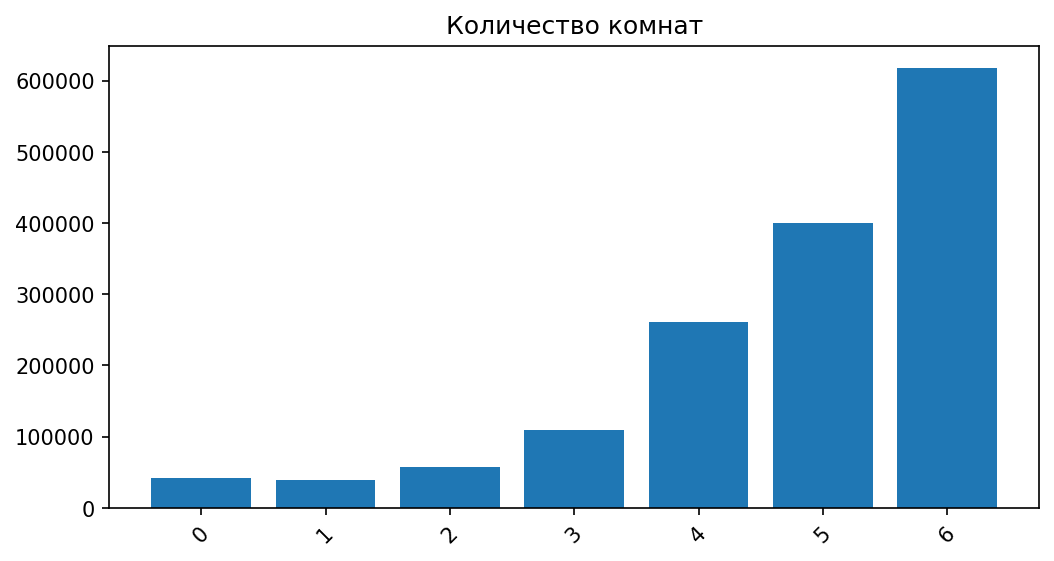

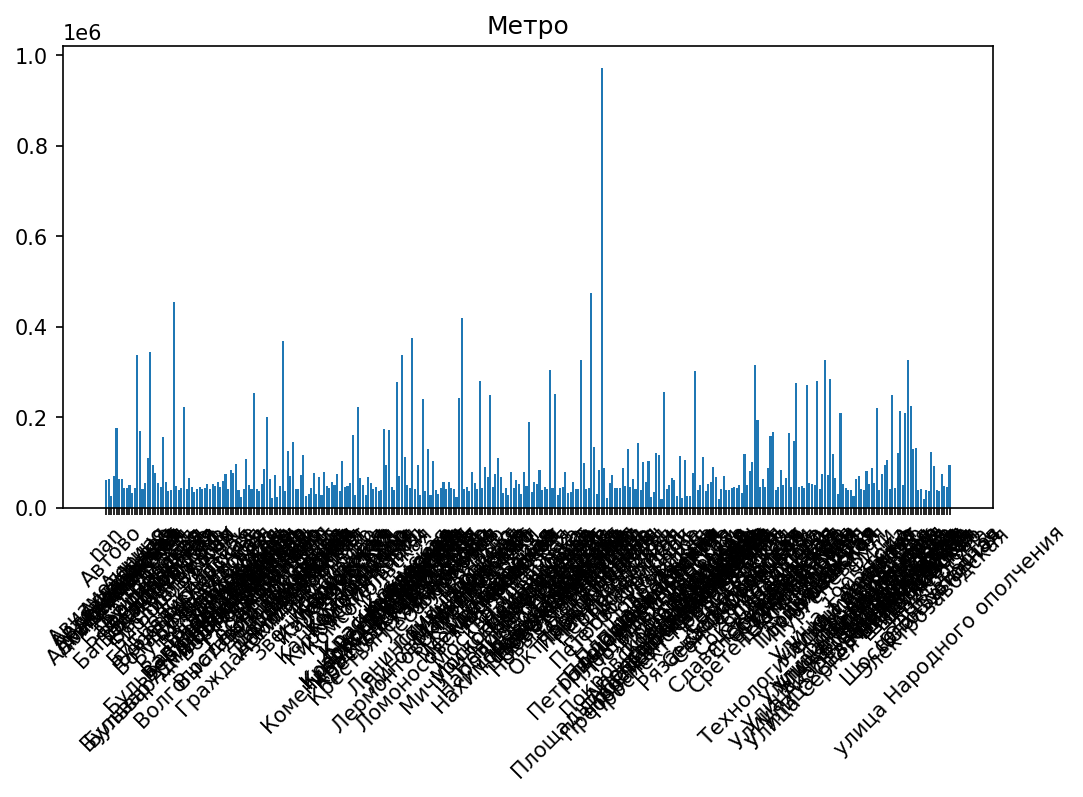

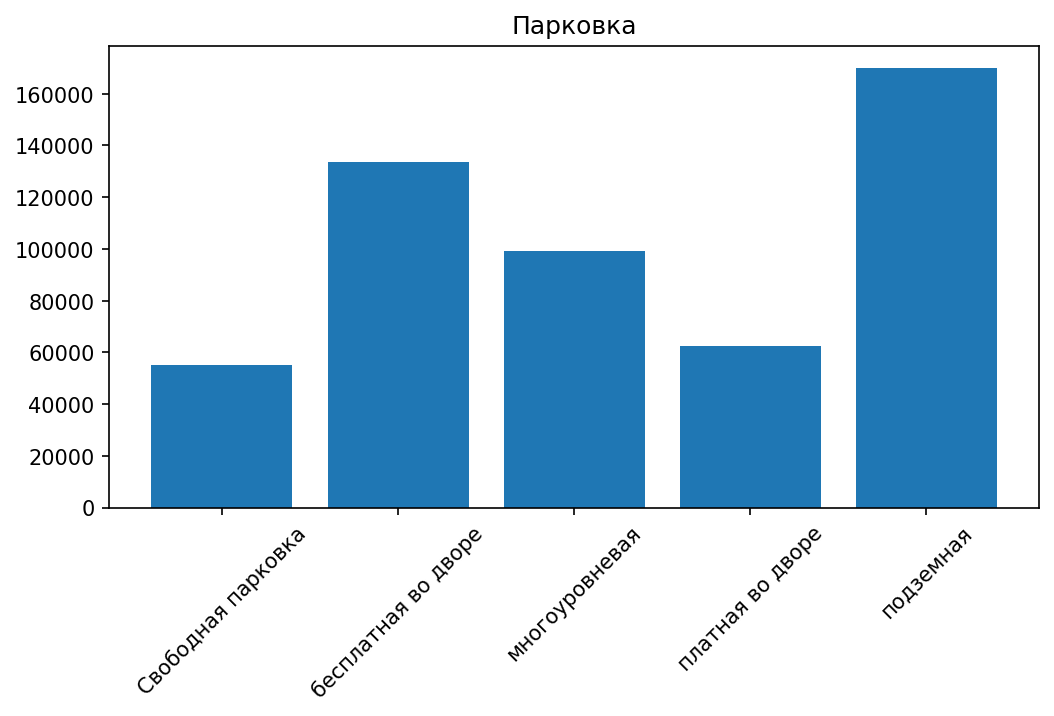

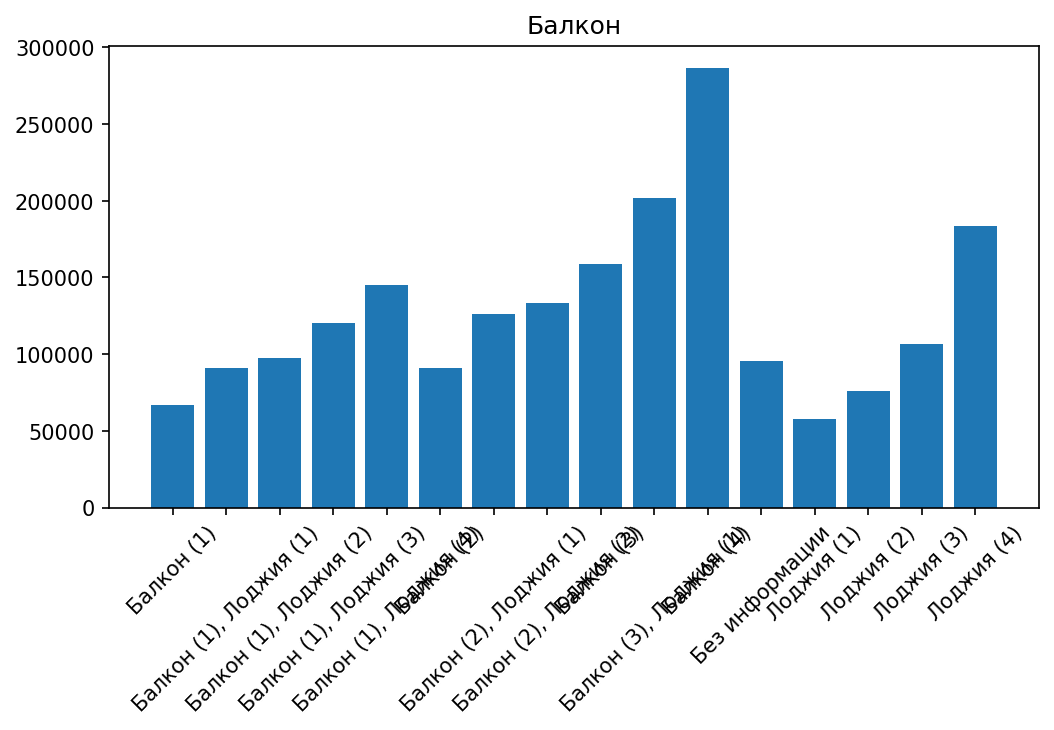

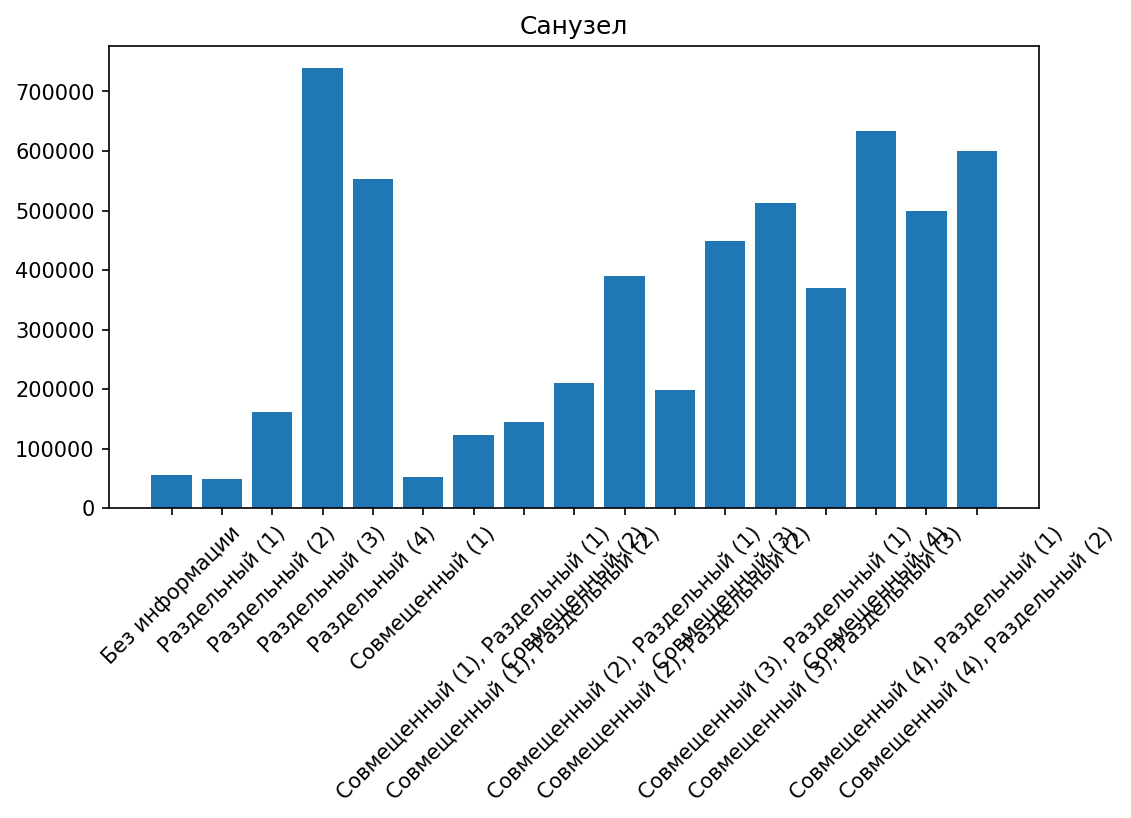

In [593]:
categorical = ['Количество комнат', 'Метро', 'Парковка', 'Балкон', 'Санузел']
for col in categorical:
    plot_mean_price(col) #вызываем функцию дя построение графиков

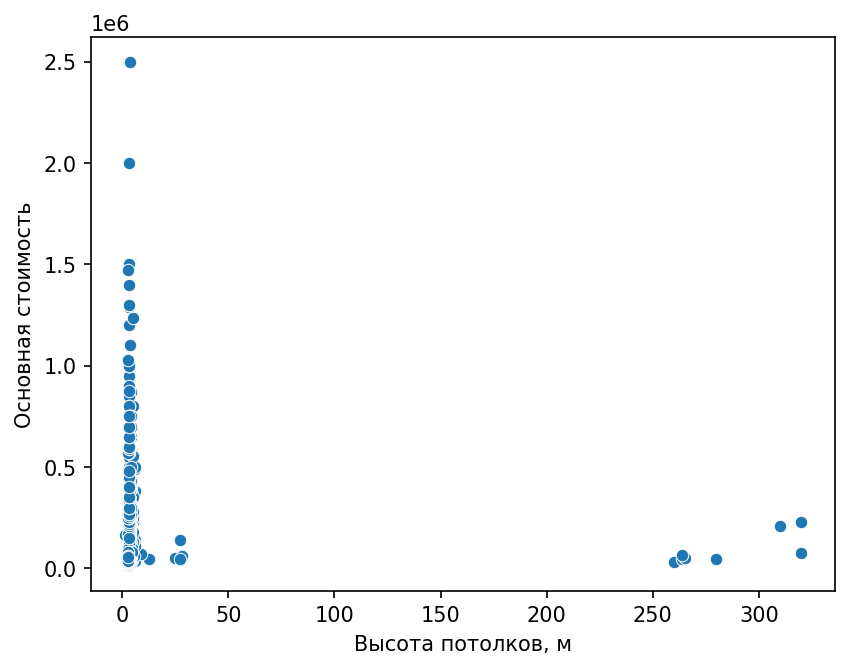

In [589]:
# График Высота потолков, м \ цена
df.dropna(subset=['Высота потолков, м'])

sns.scatterplot(data=df, x='Высота потолков, м', y='Основная стоимость');

<Axes: xlabel='Площадь кв, м2', ylabel='Основная стоимость'>

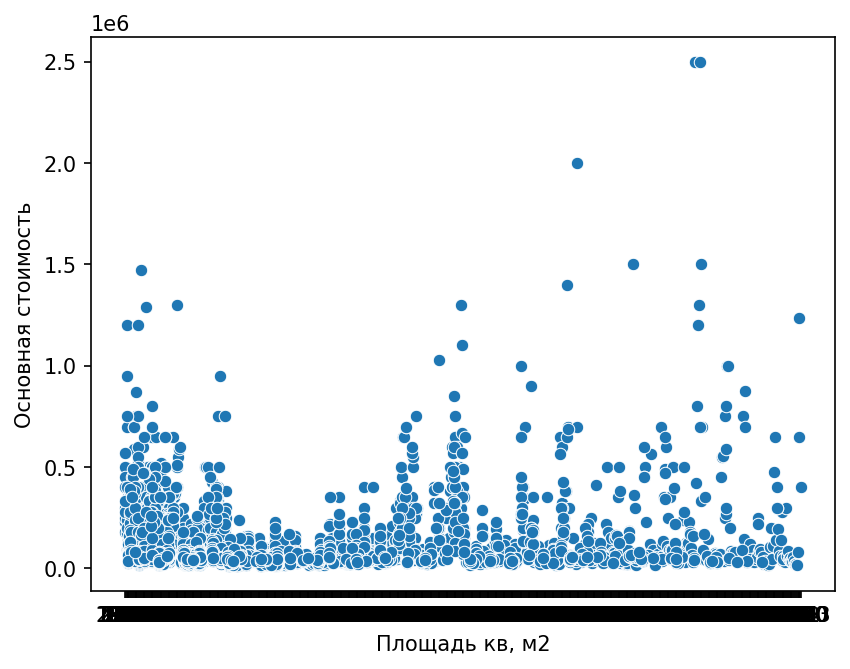

In [591]:
# График Суммарная площадь \ цена
sns.scatterplot(data=df, x='Площадь кв, м2', y='Основная стоимость')